<a href="https://colab.research.google.com/github/ayowassup/sherlock-word-analysis/blob/main/Word_Frequency_Distribution_in_Sherlock_Holmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word Frequency Distribution in "The Adventures of Sherlock Holmes"**

---

## **Project Overview:**
This Python project aims to analyze the word frequency distribution in "The Adventures of Sherlock Holmes," a classic novel by Sir Arthur Conan Doyle. The project leverages web scraping techniques, natural language processing (NLP), and data visualization to gain insights into the most frequently used words in the text.

## **Project Steps:**
1.   Web Scraping
2.   HTML Parsing and Text Extraction
3.   Tokenization and Lowercasing
4.   Stopword Removal
5.   Word Frequency Analysis
6.   WordCloud Visualization
7.   Bar Graph Visualization


## **Used Libraries:**

1.   `requests`: for making HTTP requests and fetch web content
2.   `BeautifulSoup` from `bs4`: a library for web scraping, which helps parse HTML and text extraction
3.   `nltk` (*Natural Language Toolkit*): for natural language processing tasks, including tokenization and stopwords
4.   `Counter` from `collections`: for counting word occurences
5.   `pandas`: For data manipulation (not extensively used in this project)
6.   `matplotlib.pyplot`: For plotting visualizations.
7.   `WordCloud`: For generating WordCloud visualizations.

## **Project Output:**
The final output of the project includes a list of the top twenty most frequent words, a WordCloud visualizing the top twenty words, and a bar graph providing a detailed representation of the word frequency distribution.

In [ ]:
# Importing libraries for the Word Frequency Distribution in Sherlock Holmes Novel project
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **What is Project Gutenberg?**

**Project Gutenberg** is a volunteer-driven digital library that offers a vast collection of free eBooks. Founded by Michael S. Hart in 1971, Project Gutenberg aims to digitize and archive cultural works to "encourage the creation and distribution of eBooks." The collection includes a wide range of literary works, primarily classics for which copyright has expired.

In this project, Project Gutenberg is utilized as a source to fetch "**The Adventures of Sherlock Holmes by Sir Arthur Conan Doyle**" for the purpose of analyzing word frequency distribution.

The Novel is available online as an HTML file : https://www.gutenberg.org/cache/epub/1661/pg1661-images.html

In [ ]:
# Fetching "The Adventures of Sherlock Holmes" from Project Gutenberg using requests library
read = requests.get('https://www.gutenberg.org/cache/epub/1661/pg1661-images.html')

# Setting the correct text encoding of the HTML page
read.encoding = 'utf-8'

# Extracting the HTML from the request object
html = read.text

# Printing the first 2000 characters in html
print(html[0:2000])

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight:bold;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    margin-left: 4em;
    margin-top:

# **Processing HTML Content**

This code below focuses on processing the HTML content to obtain plain text, which is a crucial step for subsequent text analysis in the project. The printed portion of the text serves as a visual check to ensure the extraction is accurate and to get an initial glimpse of the text data's structure.

In [ ]:
# Creating a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(html, 'html.parser')

# Extracting the plain text content from the HTML
text = soup.get_text()

# Printing out text between characters 32000 and 34000 for examination
print(text[32000:34000])

d—so—you will throw into the room
what I give you to throw, and will, at the same time, raise the cry of fire.
You quite follow me?”


“Entirely.”


“It is nothing very formidable,” he said, taking a long
cigar-shaped roll from his pocket. “It is an ordinary plumber’s
smoke-rocket, fitted with a cap at either end to make it self-lighting. Your
task is confined to that. When you raise your cry of fire, it will be taken up
by quite a number of people. You may then walk to the end of the street, and I
will rejoin you in ten minutes. I hope that I have made myself clear?”


“I am to remain neutral, to get near the window, to watch you, and at the
signal to throw in this object, then to raise the cry of fire, and to wait you
at the corner of the street.”


“Precisely.”


“Then you may entirely rely on me.”


“That is excellent. I think, perhaps, it is almost time that I prepare
for the new role I have to play.”


He disappeared into his bedroom and returned in a few minutes in the character

# **Words extraction**
This code below is essential for breaking down the plain text into individual words or tokens, which is a fundamental step in preparing the text data for further analysis. This specific tokenizer uses a regular expression `(\w+)` to define word boundaries and extract words from the text. The printed tokens provide a glimpse into the structure of the tokenized data.

In [ ]:
# Creating a tokenizer using regex
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the plain text
tokens = tokenizer.tokenize(text)

# Printing out the first 7 words (tokens) obtained after tokenization
tokens[:7]

['The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'Project', 'Gutenberg']

# **Lowercase the words**

In [ ]:
# Converting all tokens to lowercase
words = [token.lower() for token in tokens]

# Printing the first 7 words after lowercasing
words[:7]

['the', 'adventures', 'of', 'sherlock', 'holmes', 'project', 'gutenberg']

# **Getting a list of stopwords**
***Stopwords*** are common words that are often removed from text during natural language processing tasks because they typically do not contribute much to the overall meaning. This code below is essential for obtaining a list of English stopwords, which will be used in the next steps to filter out these common words from the text data. The printed stopwords provide a quick verification of the stopwords list.

In [ ]:
# Importing english stopwords from NLTK
from nltk.corpus import stopwords

# Getting a list of english stopwords
stopword = stopwords.words('english')

# Printing the first eight stopwords
stopword[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

# **Remove Stopwords**

This code below is used for filtering out common English stopwords from the text data, leaving behind only meaningful words. The printed words in `words_ns` provide a quick check to ensure that the filtering process has been effective in removing stopwords from the analysis.

In [ ]:
# Create a list words_ns containing all words that are in words but not in stopword list
words_ns = [word for word in words if word not in stopword]

# Printing the first 7 words after removing stopwords to verify the filtering process
words_ns[:7]

['adventures',
 'sherlock',
 'holmes',
 'project',
 'gutenberg',
 'project',
 'gutenberg']

# **Counting word occurences**

This code below is essential for the analysis of word frequency distribution. It generates a list of the top ten most common words and their counts, providing valuable information about the key terms in the processed text. The printed `top_ten` output is a summary of the most frequently used words in the text data.

In [ ]:
# Initialize a Counter object from words_ns
count = Counter(words_ns)

# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)

# Print the top ten words and their counts
print(top_ten)

[('said', 486), ('holmes', 467), ('upon', 467), ('one', 378), ('would', 327), ('man', 305), ('could', 287), ('mr', 275), ('little', 269), ('see', 232)]


# **Create a WordCloud**

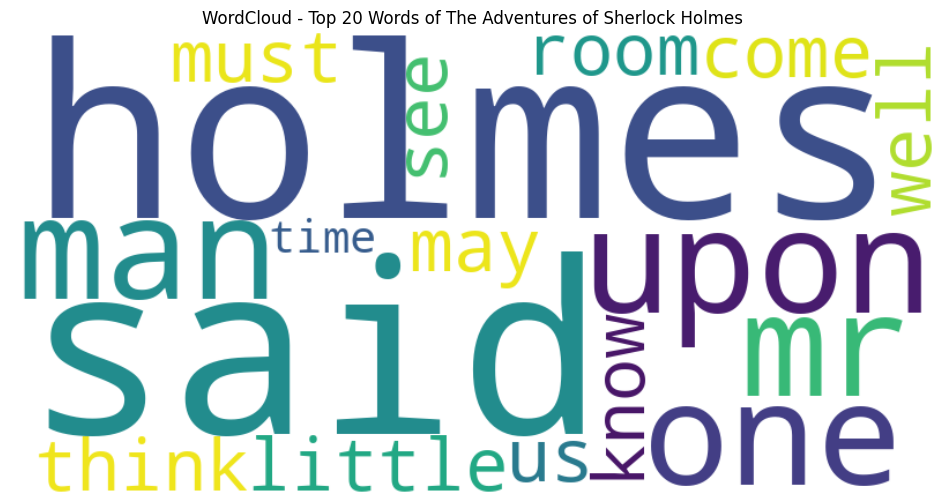

In [ ]:
# Importing necessary libraries to generate a WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generating top 20 common words and their counts
top_words = count.most_common(20)
top_20 = []
i = 0
while i < len(top_words):
  top_20.append(top_words[i][0])
  i += 1

# Converting top_20 list to a single string
top20_text = (" ").join(top_20)

# Plotting the WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(top20_text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Top 20 Words of The Adventures of Sherlock Holmes")

# Saving the WordCloud as an image file
plt.savefig("Top 20 Words from Sherlock Holmes"+".png", bbox_inches='tight')

# Displaying the WordCloud
plt.show()

# Close the plot
plt.close()

# **Bar Graph Visualization**

This code below is essential for creating a detailed and visually appealing bar graph that effectively communicates the word frequency distribution of the top 20 words in the analyzed text. The added frequency labels enhance the interpretability of the graph.

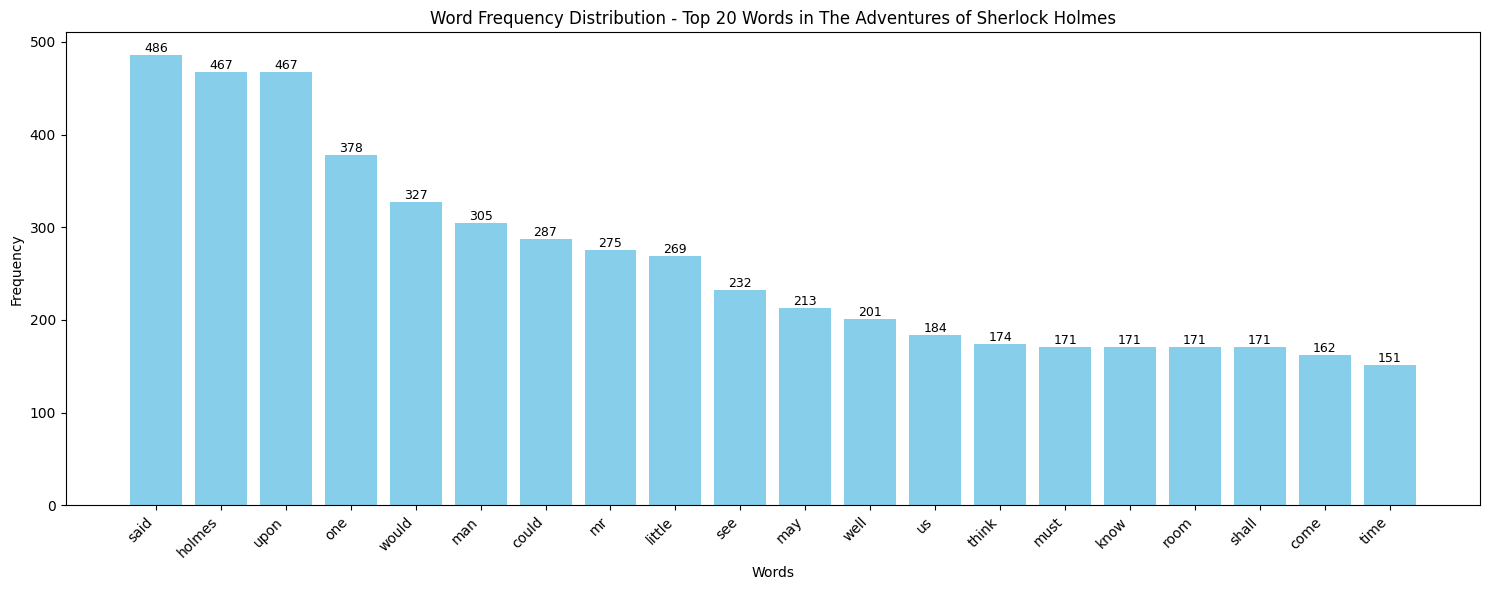

In [ ]:
# Extracting words and frequencies from the top 20 most common words
words, frequencies = zip(*top_words)

# Generating a bar graph for the word frequency distribution (top 20 words) with centered frequency labels on top
plt.figure(figsize=(15, 6))
bars = plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution - Top 20 Words in The Adventures of Sherlock Holmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding frequency labels on top of each bar
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(frequency),
             ha='center', va='bottom', fontsize=9)

# Displaying the bar graph
plt.show()

# Close the plot
plt.close()